In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('/sbnd/app/users/brindenc/mypython') #My utils path
sys.path.append('.')
import PAD_config
from bc_utils.pmtutils import pic as pmtpic
from bc_utils.pmtutils import plotters as pmtplotters
#from bc_utils.hitutils import pic as hitpic
#from bc_utils.hitutils import plotters as hitplotters
from bc_utils.utils import pic,plotters
import uproot
import pandas as pd

In [2]:
#You can also specify a cwd
cwd = os.getcwd()

%load_ext autoreload
%autoreload 2

In [3]:
#File info
DATA_DIR = PAD_config.DATA_DIR #Where's your data going?
sample = PAD_config.sample #Sample name

#Read events
readg4 = PAD_config.readg4
readop = PAD_config.readop
readcrt = PAD_config.readcrt
readmuon = PAD_config.readmuon

In [4]:
#Make dataframes
ind = 0
tpc = 1

scalarPE_df = pd.read_pickle(f'{DATA_DIR}/scalarPE{tpc}_{sample}_df.pkl')
vectorPE_df = pd.read_pickle(f'{DATA_DIR}/vectorPE{tpc}_{sample}_df.pkl')
indeces = scalarPE_df.index.drop_duplicates()

index = indeces[ind]

scalarPE_df = scalarPE_df.sort_index()
vectorPE_df = vectorPE_df.sort_index()

#Keep single event
scalardf = scalarPE_df.loc[index]
vectordf = vectorPE_df.loc[index]

In [ ]:
tright = 0.206
cs = vectordf[vectordf.loc[:,'tright'] == tright]#Initial colors, specify key later?
df = pd.concat([cs,scalardf],axis=1)
df = df.loc[:,~df.columns.duplicated()] #Remove duplicate columns

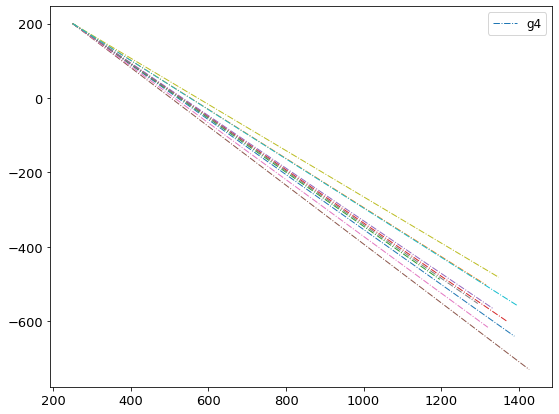

In [28]:
g4 = pd.read_pickle(f'{DATA_DIR}/g4_{sample}_df.pkl')
fig = plt.figure()
ax = fig.add_subplot()

label = 'g4'
line = pmtplotters.plot_tracks(g4,'StartPointz','StartPointy','EndPointz','EndPointy',ax,
  alpha=1,linewidth=1,linestyle='-.')
ax.legend(handles=[line],labels=[label])
#plt.plot([0,1],[0,1])

In [6]:
g4.keys()

Index(['no_primaries', 'geant_list_size', 'pdg', 'status', 'Eng', 'EndE',
       'Mass', 'Px', 'Py', 'Pz', 'P', 'StartPointx', 'StartPointy',
       'StartPointz', 'StartT', 'EndT', 'EndPointx', 'EndPointy', 'EndPointz',
       'theta_xz', 'theta_yz', 'pathlen', 'NumberDaughters', 'TrackId',
       'Mother', 'theta_yx', 'detx', 'dety', 'detz', 'treadout'],
      dtype='object')

In [9]:
op_df = pd.read_pickle(f'{DATA_DIR}/op_{sample}_df.pkl')
op_df = pd.read_pickle(f'{DATA_DIR}/op_df_{sample}__precut.pkl')
op_df.head()

ophit_opch  ophit_opdet  ophit_peakT  ophit_width  \
run subrun event                                                      
1   0      1               6            6    -1490.280        0.048   
           1               6            6        0.224        0.060   
           1               6            6        0.312        0.046   
           1               6            6        0.402        0.060   
           1               6            6        0.910        0.052   

                  ophit_area  ophit_amplitude  ophit_pe  ophit_opdet_x  \
run subrun event                                                         
1   0      1       64.366964        10.334375  0.970405         -213.4   
           1      198.026053        19.175937  2.985467         -213.4   
           1       58.966746         8.858165  0.888991         -213.4   
           1      234.583710        30.100403  3.536615         -213.4   
           1      291.960963        42.556557  4.401643         -213.4   

                  ophit_opdet_y  ophit_opdet_z  ophit_opdet_type  op_tpc  
run subrun event                                                          
1   0      1             -175.0      27.874225                 0       0  
           1             -175.0      27.874225                 0       0  
           1             -175.0      27.874225                 0       0  
           1             -175.0      27.874225                 0       0  
           1             -175.0      27.874225                 0       0

In [3]:
which_sample = 'gun0'
tpc = 1
ind = 3

#Make dataframes
scalarPE_df = pd.read_pickle(f'data/scalarPE{tpc}_{which_sample}_df.pkl')
vectorPE_df = pd.read_pickle(f'data/vectorPE{tpc}_{which_sample}_df.pkl')
pmts = pd.read_pickle('/sbnd/data/users/brindenc/analyze_sbnd/PDS/PMT_ARAPUCA_info.pkl')

indeces = scalarPE_df.index.drop_duplicates()
index = indeces[ind]

#Load dataframes for plotting
muon_df = pd.read_pickle(f'data/muon_{which_sample}_df.pkl')
g4 = pd.read_pickle(f'data/g4_{which_sample}_df.pkl')

In [6]:
muon_df.index

MultiIndex([(1, 2, 10),
            (1, 2,  3),
            (1, 2,  3),
            (1, 2,  4),
            (1, 2,  4)],
           names=['run', 'subrun', 'event'])

/sbnd/data/users/brindenc/.local/lib/python3.9/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


(<Figure size 648x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Tracks $t_r \\in$[-999,999] ms\nRun: 1 Subrun: 5 Event: 4'}, xlabel='z [cm]', ylabel='y [cm]'>)

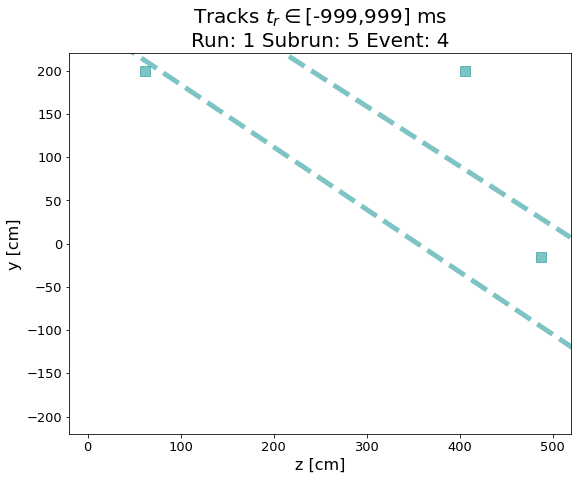

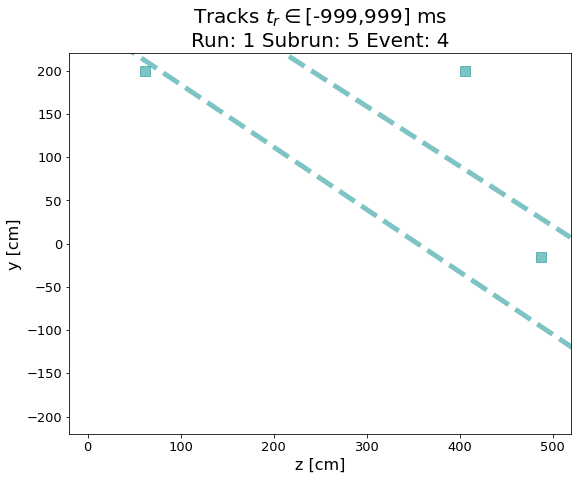

In [8]:
pmtplotters.plot_g4_muon(g4,muon_df,(1,5,4),999,-999,tpc=1)
pmtplotters.plot_g4_muon(g4,muon_df,(1,5,4),999,-999,tpc=0)

In [5]:
pmts[pmts.loc[:,'ophit_opdet'] < 4]

,ophit_opdet_x,ophit_opdet_y,ophit_opdet_z,ophit_opdet_type,opdet_tpc,ophit_opdet
ophit_opch,,,,,,
0,-213.75,-135.0,20.254225,2,0,0
1,213.75,-135.0,20.254225,2,1,1
2,-213.75,0.0,20.254225,2,0,2
3,213.75,0.0,20.254225,2,1,3


In [10]:
scalarPE_df.loc[index]
vectorPE_df.head()
muon_df.head()

/tmp/ipykernel_18544/2254097956.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  scalarPE_df.loc[index]


nmuontrks  muontrk_t0  muontrk_x1  muontrk_y1  muontrk_z1  \
run subrun event                                                              
1   2      10             1       -44.0  202.050003  109.725418   94.650002   
           3              2        -7.0 -139.649994  198.406418    5.250000   
           3              2      -999.0  202.050003  -67.463379  342.149994   
           4              2      -999.0 -202.050003  199.792053  391.049988   
           4              2       -44.0 -202.050003  -24.335314  365.250000   

                  muontrk_x2  muontrk_y2  muontrk_z2  muontrk_theta_xz  \
run subrun event                                                         
1   2      10     153.009995  189.053345    5.250000        151.253220   
           3        0.000000   82.705429  150.449997         23.255714   
           3      202.050003   81.839401  150.750000        158.198593   
           4     -202.050003  128.951187  504.149994         17.139744   
           4     -121.650002 -124.621056  504.149994         30.063705   

                  muontrk_theta_yz  muontrk_tpc  muontrk_type  
run subrun event                                               
1   2      10           138.416168            1             1  
           3            -38.549194            0             2  
           3            142.043762            1             5  
           4            -32.061218            0             5  
           4            -35.829269            0             1

/tmp/ipykernel_18544/3269881841.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fig,ax = pmtplotters.interactive_TPC(1,'ophit_opch','',scalarPE_df.loc[index],text_label='ophit_opch')


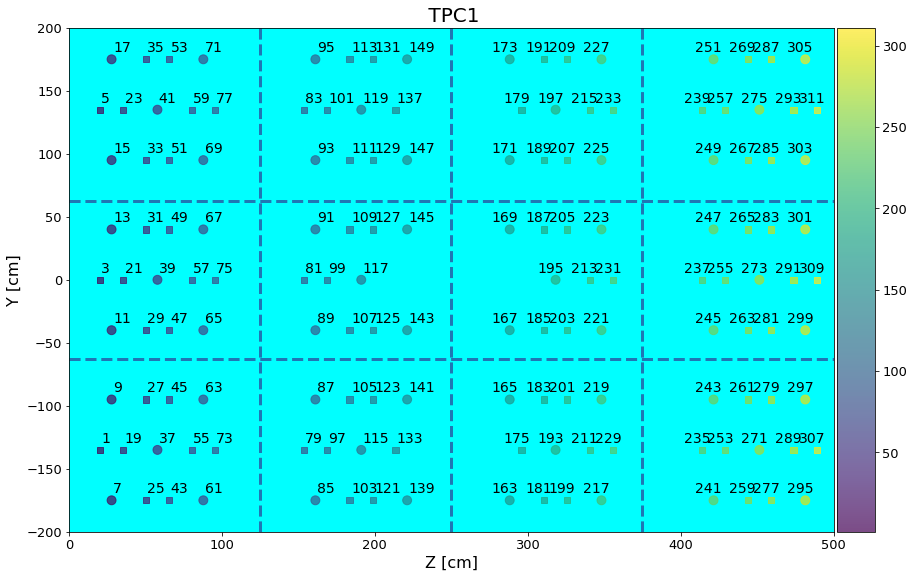

In [8]:
fig,ax = pmtplotters.interactive_TPC(1,'ophit_opch','',scalarPE_df.loc[index],text_label='ophit_opch')

In [4]:
vectorPE_df

summed_PE  tright  ophit_ch  muontrk_label
run subrun event                                            
1.0 2.0    3.0          0.0   0.364       6.0        -9999.0
           3.0          0.0   0.366       6.0        -9999.0
           3.0          0.0   0.368       6.0        -9999.0
           3.0          0.0   0.370       6.0        -9999.0
           3.0          0.0   0.372       6.0        -9999.0
...                     ...     ...       ...            ...
    6.0    7.0          0.0   0.420     258.0        -9999.0
           7.0          0.0   0.422     258.0        -9999.0
           7.0          0.0   0.424     258.0        -9999.0
           7.0          0.0   0.426     258.0        -9999.0
           7.0          0.0   0.428     258.0        -9999.0

[58608 rows x 4 columns]

In [21]:
a = np.arange(12).reshape((3, 4))
a[~np.any(a == 5, axis=1)]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])